<a href="https://colab.research.google.com/github/nathantorento/homelessness-vs-housing-prices-sf-bay-ca/blob/main/MSBA326_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install numpy pandas matplotlib seaborn statsmodels -q

#2. Exploratory Data Analysis (EDA)

*   Simple trends of housing prices and homelessness over time
*   Geographical mapping
*   Demographic information of homeless

In [ ]:
# Import all relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import copy

from io import BytesIO

pd.set_option('display.max_columns', None)
bay_area = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

In [ ]:
# Customer function to see NaN count and percentage
def nan_percentage(dataset):
  nan_count = dataset.isnull().sum()
  nan_percentage = (nan_count / len(dataset)) * 100
  nan_info = pd.DataFrame({'NaN Count': nan_count, 'NaN Percentage': nan_percentage})

  # Filter columns with non-zero NaN count
  nan_info = nan_info[nan_info['NaN Count'] > 0]

  return nan_info

In [ ]:
# Load Homelessness by Age Dataset and rename column names to match other datasets
HbA_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/b1a5ae24-5842-425c-b56c-aa90f8f1c767/download/experiencing_homelessness_age_demographics.csv'
HbA_df = pd.read_csv(HbA_df_link)
HbA_df.rename(columns={'EXPERIENCING_HOMELESSNESS_CNT': 'EXPERIENCING_HOMELESSNESS'}, inplace=True)
HbA_df.sample(n=5)

,CALENDAR_YEAR,LOCATION_ID,LOCATION,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS
1782,2021,CA-614,San Luis Obispo County CoC,65+,152
1495,2021,CA-507,Marin County CoC,Under 18,324
99,2017,CA-511,San Joaquin County CoC,45-54,1045
2142,2022,CA-614,San Luis Obispo County CoC,65+,177
960,2019,CA-531,Nevada County CoC,Unknown,*


In [ ]:
# Load Homelessness by Ethnicity Dataset
HbE_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/d59a65e6-08b4-4641-8118-79338328bbb2/download/experiencing_homelessness_ethnicity_demographics.csv'
HbE_df = pd.read_csv(HbE_df_link)
HbE_df.sample(n=5)

,CALENDAR_YEAR,LOCATION_ID,LOCATION,ETHNICITY,EXPERIENCING_HOMELESSNESS
211,2018,CA-529,Lake County CoC,Not Hispanic/Latinx,67
350,2019,CA-600,Los Angeles County CoC,Hispanic/Latinx,28905
89,2017,CA-531,Nevada County CoC,Unknown,*
120,2017,CA-612,Glendale CoC (Los Angeles County),Unknown,*
108,2017,CA-607,Pasadena CoC (Los Angeles County),Unknown,122


In [ ]:
# Load Homeless by Race Dataset
HbR_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/b7ce1242-0e33-44c8-b561-4c34c5e78312/download/experiencing_homelessness_race_demographics.csv'
HbR_df = pd.read_csv(HbR_df_link)
HbR_df.sample(n=5)

,CALENDAR_YEAR,LOCATION_ID,LOCATION,RACE,EXPERIENCING_HOMELESSNESS
1661,2022,CA-517,Napa County CoC,"American Indian, Alaska Native, or Indigenous",92
182,2017,CA-526,"Amador, Calaveras, Mariposa, Tuolumne Counties...","American Indian, Alaska Native, or Indigenous",17
2022,2023,CA-523,"Colusa, Glenn, Trinity Counties CoC",Unknown,*
455,2018,CA-520,Merced County CoC,White,651
755,2019,CA-520,Merced County CoC,"Black, African American, or African",550


In [ ]:
# Load Homelessness by Gender Dataset
HbG_df_link = 'https://data.ca.gov/dataset/c7ed1ae4-4f93-4fc7-b603-3cd07a55d862/resource/57142555-f2da-462f-a999-d44abf0af69c/download/experiencing_homelessness_gender_demographics.csv'
HbG_df = pd.read_csv(HbG_df_link)
HbG_df.sample(n=5)

,CALENDAR_YEAR,LOCATION_ID,LOCATION,GENDER,EXPERIENCING_HOMELESSNESS
64,2017,CA-511,San Joaquin County CoC,Transgender,*
820,2021,CA-504,Sonoma County CoC,Non-Singular Gender,15
1171,2022,CA-531,Nevada County CoC,Non-Singular Gender,*
219,2018,CA-504,Sonoma County CoC,Unknown,*
1256,2023,CA-500,Santa Clara County CoC,Unknown,28


In [ ]:
HbA_df_2022 = HbA_df[HbA_df['CALENDAR_YEAR']==2022]
HbA_df_2022_sf = HbA_df_2022[HbA_df_2022['LOCATION']=='San Francisco CoC']
HbA_df_2022_sf['EXPERIENCING_HOMELESSNESS'].sum()

'152835783577270021799573937303'

In [ ]:
HbG_df_2022 = HbG_df[HbG_df['CALENDAR_YEAR']==2022]
HbG_df_2022_sf = HbG_df_2022[HbG_df_2022['LOCATION']=='San Francisco CoC']
HbG_df_2022_sf['EXPERIENCING_HOMELESSNESS'].sum()

'684710852140*223142'

In [ ]:
# URL of the Excel file
median_sfh_prices_link = 'https://content.car.org/Public%20Products/Current%20Sales%20and%20Price/MedianPricesofExistingDetachedHomesHistoricalData.xlsx'
median_sfh_prices_df = pd.read_excel(BytesIO(requests.get(median_sfh_prices_link).content), skiprows=7)

median_sfh_prices_df.head()

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Clara,Santa Cruz,Shasta,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,Unnamed: 54,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,1990-01-01,194952.0,226148.902299,NaN,102142.75,NaN,NaN,NaN,NaN,82083.125000,NaN,79641.892857,85892,NaN,NaN,NaN,215337.926006,NaN,346153.0,NaN,140000.000000,83889.0,93291.0,233333,178888.0,NaN,231273.890669,182220.0,NaN,136832.042365,123000.0,NaN,128806.0,180484.0,287499,105000.0,227522.359311,NaN,273071.291179,271840,250000.0,NaN,NaN,NaN,174022.0,NaN,NaN,NaN,NaN,86999.300000,NaN,250410.0,NaN,NaN,NaN,141519.0,203389.543331,NaN,NaN,NaN,NaN,227365.834348,NaN
1,1990-02-01,196273.0,219306.000000,NaN,83333.00,NaN,NaN,NaN,NaN,87186.781250,NaN,83571.071429,80294,NaN,NaN,NaN,208399.117906,NaN,338333.0,NaN,116665.833333,77499.0,NaN,187856,186363.0,NaN,233655.576728,182630.0,NaN,136021.271454,126900.0,NaN,124545.0,180714.0,300877,102500.0,236377.257623,NaN,259668.432093,273100,261607.0,NaN,NaN,NaN,180294.0,NaN,NaN,NaN,NaN,84374.562500,NaN,235760.0,NaN,NaN,NaN,144965.0,211024.114600,NaN,NaN,NaN,NaN,234739.457236,NaN
2,1990-03-01,194856.0,225162.000000,NaN,100000.00,NaN,NaN,NaN,NaN,83888.500000,NaN,88888.000000,87758,NaN,NaN,NaN,208134.862749,NaN,358571.0,NaN,111428.000000,85909.0,NaN,230555,180000.0,NaN,242312.497453,179470.0,NaN,135835.177355,127500.0,NaN,127017.0,183701.0,290151,117692.0,216010.036342,NaN,253300.991913,275500,260577.0,NaN,NaN,NaN,178823.0,NaN,NaN,NaN,NaN,84210.105263,NaN,240320.0,NaN,NaN,NaN,141132.0,209286.092622,NaN,NaN,NaN,NaN,235336.501496,NaN
3,1990-04-01,196111.0,229333.000000,NaN,107999.60,NaN,NaN,NaN,NaN,85428.028571,NaN,83499.650000,80323,NaN,NaN,NaN,219003.989632,NaN,359574.0,NaN,133332.666667,84285.0,NaN,238095,158571.0,NaN,239380.494779,200000.0,NaN,134629.071461,135500.0,NaN,131485.0,181567.0,288725,112692.0,189245.536376,NaN,217363.225250,274660,255263.0,NaN,NaN,NaN,184117.0,NaN,NaN,NaN,NaN,88927.678571,NaN,230620.0,NaN,NaN,NaN,145707.0,210301.589421,NaN,NaN,NaN,NaN,233178.496107,NaN
4,1990-05-01,195281.0,232291.000000,NaN,100000.00,NaN,NaN,NaN,NaN,88749.125000,NaN,79061.593750,86562,NaN,NaN,NaN,209065.024168,NaN,374999.0,NaN,138749.062500,100000.0,NaN,259375,187692.0,NaN,256401.384617,194610.0,NaN,140823.471660,138000.0,NaN,130538.0,180794.0,282626,112778.0,199325.054453,NaN,227608.897910,266670,262500.0,NaN,NaN,NaN,185844.0,NaN,NaN,NaN,NaN,85999.400000,NaN,235320.0,NaN,NaN,NaN,146060.0,210147.747929,NaN,NaN,NaN,NaN,235881.361604,NaN


In [ ]:
median_sfh_prices_df.tail()

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Clara,Santa Cruz,Shasta,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,Unnamed: 54,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
400,2023-05-01,836110.0,1260000.0,449000.0,436950.0,550000.0,888000.0,315000.0,660000.0,420000.0,345000.0,435000.0,379320,370000.0,398000.0,224900.0,744770.0,411610.0,1800000.0,382500.0,532500.0,395000.0,850000.0,902000,888500.0,552500.0,1256500.0,682500.0,355000.0,629000.0,535000.0,735000.0,455000.0,935000.0,1654000,531950.0,874500.0,2075000.0,1275000.0,1788000,1352500.0,385000.0,256000.0,600000.0,860000.0,463500.0,439500.0,348000.0,263250,375060.0,424500.0,925500.0,646730.0,440990.0,NaN,635000.0,765000.0,1000000.0,485000.0,380000.0,574990.0,1300000.0,800000.0
401,2023-06-03,838260.0,1305000.0,470000.0,413500.0,459000.0,930000.0,410000.0,700000.0,429390.0,360000.0,440000.0,381180,355000.0,342500.0,261250.0,832210.0,447700.0,1715000.0,450000.0,520000.0,390650.0,925000.0,796370,843750.0,573860.0,1260000.0,667500.0,390000.0,628000.0,530000.0,750000.0,470000.0,958250.0,1595000,530400.0,865000.0,2039000.0,1197000.0,1825000,1200000.0,385000.0,289900.0,590000.0,850000.0,460000.0,437000.0,362500.0,305000,375000.0,413000.0,927500.0,617000.0,445000.0,NaN,650000.0,775000.0,984500.0,480000.0,389000.0,570000.0,1323810.0,815000.0
402,2023-07-01,832400.0,1260000.0,442000.0,429000.0,476500.0,900000.0,349000.0,650000.0,417500.0,372500.0,465000.0,395000,385000.0,335000.0,280000.0,851540.0,426000.0,1609500.0,459000.0,540000.0,390000.0,785000.0,949000,927500.0,579900.0,1300000.0,660000.0,364050.0,615000.0,547000.0,745000.0,485000.0,969020.0,1460000,545000.0,860000.0,1984000.0,994470.0,1800000,1300000.0,379000.0,296000.0,600560.0,850960.0,465000.0,402000.0,320000.0,320000,370520.0,463500.0,920000.0,625000.0,415000.0,NaN,645000.0,790000.0,985000.0,489000.0,376420.0,575000.0,1255000.0,830000.0
403,2023-08-04,859800.0,1250000.0,490000.0,436250.0,475000.0,844440.0,382500.0,657000.0,425000.0,321000.0,421920.0,394500,382500.0,325000.0,225000.0,882020.0,453000.0,1475000.0,480000.0,560000.0,385000.0,970000.0,897000,1055000.0,555000.0,1310000.0,669000.0,412000.0,618000.0,535000.0,777550.0,495000.0,1000000.0,1576000,535000.0,868810.0,1950000.0,1295000.0,1852500,1200000.0,365000.0,305500.0,599000.0,850000.0,465000.0,425000.0,312050.0,205000,372000.0,389500.0,915000.0,622500.0,449500.0,NaN,657000.0,792500.0,950000.0,485000.0,369000.0,569990.0,1260000.0,830000.0
404,2023-09-01,843340.0,1300000.0,414250.0,429420.0,537500.0,871250.0,400000.0,685000.0,410000.0,300000.0,422500.0,383000,370750.0,260000.0,181250.0,914640.0,410000.0,1650000.0,432500.0,448000.0,384500.0,935000.0,943340,890000.0,563000.0,1310000.0,665000.0,441250.0,600000.0,545000.0,761250.0,475000.0,973100.0,1580000,550000.0,888000.0,1955000.0,1030000.0,1853000,1165000.0,385000.0,325000.0,585680.0,848000.0,469500.0,430000.0,310000.0,320000,385000.0,419000.0,962500.0,608640.0,433250.0,NaN,650000.0,780000.0,950000.0,481000.0,385000.0,550000.0,1300000.0,820000.0


In [ ]:
# Custom function to merge all 4 homelessness datasets so that each as a dictionary
# Also creates an aggregate overall "homelessness" count for that location per year
def merge_homelessness_datasets(HbA_dataset, HbR_dataset, HbE_dataset, HbG_dataset):
    # Convert 'EXPERIENCING_HOMELESSNESS' columns to integer type so we don't run into trouble later on
    HbA_dataset['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbA_dataset['EXPERIENCING_HOMELESSNESS'], errors='coerce').fillna(0)
    HbR_dataset['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbR_dataset['EXPERIENCING_HOMELESSNESS'], errors='coerce').fillna(0)
    HbE_dataset['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbE_dataset['EXPERIENCING_HOMELESSNESS'], errors='coerce').fillna(0)
    HbG_dataset['EXPERIENCING_HOMELESSNESS'] = pd.to_numeric(HbG_dataset['EXPERIENCING_HOMELESSNESS'], errors='coerce').fillna(0)

    # Bay Area
    bay_area = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

    # Perform partial string matching to filter dataset for Bay Area counties
    HbA_temp = HbA_dataset[HbA_dataset['LOCATION'].str.contains('|'.join(bay_area), case=False)]
    HbR_temp = HbR_dataset[HbR_dataset['LOCATION'].str.contains('|'.join(bay_area), case=False)]
    HbE_temp = HbE_dataset[HbE_dataset['LOCATION'].str.contains('|'.join(bay_area), case=False)]
    HbG_temp = HbG_dataset[HbG_dataset['LOCATION'].str.contains('|'.join(bay_area), case=False)]

    # Calculate average 'EXPERIENCING_HOMELESSNESS' for Bay Area by 'CALENDAR_YEAR'
    HbA_ave_bay = HbA_temp.groupby(list(HbA_temp.columns.difference(['EXPERIENCING_HOMELESSNESS', 'LOCATION', 'LOCATION_ID'])))['EXPERIENCING_HOMELESSNESS'].sum().reset_index()
    HbR_ave_bay = HbR_temp.groupby(list(HbR_temp.columns.difference(['EXPERIENCING_HOMELESSNESS', 'LOCATION', 'LOCATION_ID'])))['EXPERIENCING_HOMELESSNESS'].sum().reset_index()
    HbE_ave_bay = HbE_temp.groupby(list(HbE_temp.columns.difference(['EXPERIENCING_HOMELESSNESS', 'LOCATION', 'LOCATION_ID'])))['EXPERIENCING_HOMELESSNESS'].sum().reset_index()
    HbG_ave_bay = HbG_temp.groupby(list(HbG_temp.columns.difference(['EXPERIENCING_HOMELESSNESS', 'LOCATION', 'LOCATION_ID'])))['EXPERIENCING_HOMELESSNESS'].sum().reset_index()

    # Add a row for 'Bay Area' with calculated average values
    HbA_ave_bay['LOCATION'] = 'Bay Area'
    HbR_ave_bay['LOCATION'] = 'Bay Area'
    HbE_ave_bay['LOCATION'] = 'Bay Area'
    HbG_ave_bay['LOCATION'] = 'Bay Area'

    HbA_dataset = pd.concat([HbA_dataset, HbA_ave_bay], ignore_index=True)
    HbR_dataset = pd.concat([HbR_dataset, HbR_ave_bay], ignore_index=True)
    HbE_dataset = pd.concat([HbE_dataset, HbE_ave_bay], ignore_index=True)
    HbG_dataset = pd.concat([HbG_dataset, HbG_ave_bay], ignore_index=True)
    ### –––––––––––– ###

    # Merge the datasets on common columns with different suffixes
    hdf = pd.merge(HbA_dataset, HbR_dataset, on=['CALENDAR_YEAR', 'LOCATION'], how='outer', suffixes=('_A', '_R'))
    hdf = pd.merge(hdf, HbE_dataset, on=['CALENDAR_YEAR', 'LOCATION'], how='outer', suffixes=('_AR', '_E'))
    hdf = pd.merge(hdf, HbG_dataset, on=['CALENDAR_YEAR', 'LOCATION'], how='outer', suffixes=('_ARE', '_G'))

    # Group by common columns and aggregate data into a dictionary of dictionaries
    hdf = hdf.groupby(['CALENDAR_YEAR', 'LOCATION']).apply(
        lambda x: {
            'AGE': dict(zip(x['AGE_GROUP_PUBLIC'], x['EXPERIENCING_HOMELESSNESS_A'])),
            'RACE': dict(zip(x['RACE'], x['EXPERIENCING_HOMELESSNESS_R'])),
            'ETHNICITY': dict(zip(x['ETHNICITY'], x['EXPERIENCING_HOMELESSNESS_ARE'])),
            'GENDER': dict(zip(x['GENDER'], x['EXPERIENCING_HOMELESSNESS_G']))
        }
    ).reset_index()

    # Extract dictionaries into separate columns
    hdf[['AGE', 'RACE', 'ETHNICITY', 'GENDER']] = pd.DataFrame(hdf[0].tolist(), index=hdf.index) #grouped.index ensures row alignment

    # Drop the leftover '0' column containing the dictionary of dictionaries made earlier
    hdf.drop(columns=[0], inplace=True)

    ### –– Create Aggregate Sum for Homelessness Per Year Per Location Using Ethnicity as Proxy –– ###
    hdf['Total_Homeless'] = hdf['ETHNICITY'].apply(lambda x: sum(x.values()))
    ### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ###

    return hdf


In [ ]:
# Apply merge_homelessness_datasets function onto the four datasets and save as one dataset
pre_hdf = merge_homelessness_datasets(HbA_df, HbR_df, HbE_df, HbG_df)

pre_hdf.head()

,CALENDAR_YEAR,LOCATION,AGE,RACE,ETHNICITY,GENDER,Total_Homeless
0,2017,Alameda County CoC,"{'18-24': 799.0, '25-34': 930.0, '35-44': 791....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1285.0, 'Not Hispanic/Lati...","{'Female': 3015.0, 'Male': 3548.0, 'Non-Singul...",6609.0
1,2017,"Alpine, Inyo, Mono Counties CoC","{'18-24': 16.0, '25-34': 22.0, '35-44': 25.0, ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 40.0, 'Not Hispanic/Latinx...","{'Female': 79.0, 'Male': 82.0}",161.0
2,2017,"Amador, Calaveras, Mariposa, Tuolumne Counties...","{'18-24': 31.0, '25-34': 70.0, '35-44': 58.0, ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 64.0, 'Not Hispanic/Latinx...","{'Female': 224.0, 'Male': 158.0}",382.0
3,2017,Bay Area,"{'18-24': 3274.0, '25-34': 5533.0, '35-44': 52...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 11623.0, 'Not Hispanic/Lat...","{'Female': 15359.0, 'Male': 21124.0, 'Non-Sing...",36913.0
4,2017,Butte County CoC,"{'18-24': 125.0, '25-34': 287.0, '35-44': 210....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 174.0, 'Not Hispanic/Latin...","{'Female': 619.0, 'Male': 760.0, 'Non-Singular...",1374.0


In [ ]:
# Custom function to clean and filter homelessness dataset
def clean_homelessness_dataset(dataset):
    # Remove 'Counties CoC' or 'County CoC' at the end of LOCATION column values
    dataset['LOCATION'] = dataset['LOCATION'].str.replace(r'\s(CoC|Count(y|ies) CoC).*$', '', regex=True)

    # Rename columns
    dataset.rename(columns={
        'CALENDAR_YEAR': 'Year',
        'LOCATION': 'CoC',
        'EXPERIENCING_HOMELESSNESS': 'Homeless'
    }, inplace=True)

    return dataset

In [ ]:
# # Apply filter and cleaning function
# final_CoCs = ["California", "Bay Area", "San Francisco",
#     "Alameda", "Amador, Calaveras, Mariposa, Tuolumne", "Butte", "Amador", "Calaveras",
#     "Mariposa", "Tuolumne", "Contra Costa", "El Dorado", "Humboldt", "Kern", "Marin",
#     "Merced", "Napa", "Nevada", "Orange", "Placer", "Riverside", "Sacramento",
#     "San Bernardino", "San Diego", "San Joaquin", "San Luis Obispo", "San Mateo",
#     "Santa Barbara", "Santa Clara", "Santa Cruz", "Solano", "Sonoma", "Stanislaus",
#     "Sutter", "Tehama", "Tulare", "Ventura", "Yolo", "Yuba"
# ]

hdf = clean_homelessness_dataset(pre_hdf)
hdf.head()

,Year,CoC,AGE,RACE,ETHNICITY,GENDER,Total_Homeless
0,2017,Alameda,"{'18-24': 799.0, '25-34': 930.0, '35-44': 791....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1285.0, 'Not Hispanic/Lati...","{'Female': 3015.0, 'Male': 3548.0, 'Non-Singul...",6609.0
1,2017,"Alpine, Inyo, Mono","{'18-24': 16.0, '25-34': 22.0, '35-44': 25.0, ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 40.0, 'Not Hispanic/Latinx...","{'Female': 79.0, 'Male': 82.0}",161.0
2,2017,"Amador, Calaveras, Mariposa, Tuolumne","{'18-24': 31.0, '25-34': 70.0, '35-44': 58.0, ...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 64.0, 'Not Hispanic/Latinx...","{'Female': 224.0, 'Male': 158.0}",382.0
3,2017,Bay Area,"{'18-24': 3274.0, '25-34': 5533.0, '35-44': 52...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 11623.0, 'Not Hispanic/Lat...","{'Female': 15359.0, 'Male': 21124.0, 'Non-Sing...",36913.0
4,2017,Butte,"{'18-24': 125.0, '25-34': 287.0, '35-44': 210....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 174.0, 'Not Hispanic/Latin...","{'Female': 619.0, 'Male': 760.0, 'Non-Singular...",1374.0


In [ ]:
hdf.columns

Index(['Year', 'CoC', 'AGE', 'RACE', 'ETHNICITY', 'GENDER', 'Total_Homeless'], dtype='object')

In [ ]:
hdf['AGE'][0].keys()

dict_keys(['18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Under 18', 'Unknown'])

In [ ]:
hdf['RACE'][0].keys()

dict_keys(['American Indian, Alaska Native, or Indigenous', 'Asian or Asian American', 'Black, African American, or African', 'Multiple Races', 'Native Hawaiian or Pacific Islander', 'Unknown', 'White'])

In [ ]:
hdf['ETHNICITY'][0].keys()

dict_keys(['Hispanic/Latinx', 'Not Hispanic/Latinx', 'Unknown'])

In [ ]:
hdf['GENDER'][0].keys()

dict_keys(['Female', 'Male', 'Non-Singular Gender', 'Questioning Gender', 'Transgender', 'Unknown'])

In [ ]:
# Custom function to clean and filter homelessness dataset
def clean_housing_dataset(df):
    # Make a copy
    pdf = df.copy()

    # Convert "Mon-Yr" column to datetime format
    pdf['Mon-Yr'] = pd.to_datetime(pdf['Mon-Yr'])
    pdf.rename(columns={'Mon-Yr': 'Year'}, inplace=True)

    # Extract year from the "Mon-Yr" column and group by year, calculating the mean for each column
    counties = pdf.columns.difference(['Year']) # get list of counties
    pdf = pdf.groupby(pdf['Year'].dt.year)[counties].mean(numeric_only=True)

    # Reset the index to bring 'Year' column back
    pdf.reset_index(inplace=True)

    # Filter data from 2017 to the latest year
    pdf = pdf[(pdf['Year'] >= 2017) & (pdf['Year'] <= 2022)]

    # Change names inconsistent with homeless dataset
    pdf.rename(columns={'CA': 'California', 'Contra-Costa': 'Contra Costa'}, inplace=True)

    # Create relevant lists
    single_CoCs = ["California", "San Francisco", "Alameda", "Butte", "Amador", "Butte", "Calaveras", "Contra Costa", "El Dorado", "Humboldt", "Kern", "Los Angeles", "Marin", "Mariposa", "Merced", "Napa", "Nevada", "Orange", "Placer", "Riverside", "Sacramento", "San Bernardino", "San Diego", "San Joaquin", "San Luis Obispo", "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz", "Solano", "Sonoma", "Stanislaus", "Sutter", "Tehama", "Tulare", "Tuolumne", "Ventura", "Yolo", "Yuba"]
    grouped_Cocs_1 = ["Amador", "Calaveras", "Mariposa", "Tuolumne"]
    grouped_Cocs_2 = ["Yuba", "Sutter"]

    # Filter for single_CoCs
    pdf = pdf[['Year']+single_CoCs]

    # Group county columns accordingly
    pdf[', '.join(grouped_Cocs_1)] = pdf[grouped_Cocs_1].mean(axis=1)
    pdf.drop(columns=grouped_Cocs_1, inplace=True)

    pdf[', '.join(grouped_Cocs_2)] = pdf[grouped_Cocs_2].mean(axis=1)
    pdf.drop(columns=grouped_Cocs_2, inplace=True)

    # Melt the DataFrame to transform the columns for counties into rows under a new column 'Median_Prices'
    melted_df = pdf.melt(id_vars='Year', var_name='CoC', value_name='Prices')

    ### –––– Add Bay Area –––– ###
    bay_area_data = melted_df[melted_df['CoC'].isin(bay_area)]

    # Calculate average Prices for Bay Area by 'Year' and create a new row for 'Bay Area'
    avg_bay_area = bay_area_data.groupby('Year')['Prices'].mean().reset_index()
    avg_bay_area['CoC'] = 'Bay Area'

    # Append the average Bay Area prices to melted_df
    melted_df = pd.concat([melted_df, avg_bay_area], ignore_index=True)
    ### –––––––––––––––––––––– ###

    # Sort the values by 'Year' for better visualization
    melted_df = melted_df.sort_values(by='Year')

    return melted_df

In [ ]:
# Apply cleaning function
pdf = clean_housing_dataset(median_sfh_prices_df)
pdf

,Year,CoC,Prices
0,2017,California,5.370258e+05
150,2017,Santa Cruz,8.347083e+05
36,2017,El Dorado,4.588917e+05
144,2017,Santa Clara,1.168333e+06
42,2017,Humboldt,3.054333e+05
...,...,...,...
155,2022,Santa Cruz,1.319583e+06
161,2022,Solano,5.990417e+05
167,2022,Sonoma,8.268875e+05
179,2022,Tehama,3.273942e+05


In [ ]:
hdf_cut = hdf.copy()

# Function to split dictionary keys into separate columns
def split_dict_column(df, col_name):
    split_col = df[col_name].apply(pd.Series)
    df = pd.concat([df, split_col.add_prefix(f'{col_name.title()}:')], axis=1)
    df.drop(columns=col_name, inplace=True)

    return df

# Apply the function to split columns
columns_to_split = ['AGE', 'RACE', 'ETHNICITY', 'GENDER']
for col in columns_to_split:
    hdf_cut = split_dict_column(hdf_cut, col)

hdf_cut = pd.merge(hdf_cut[[col for col in hdf_cut.columns if col not in columns_to_split]], pdf, on=["Year", "CoC"])

hdf_cut.sample(n=10, random_state=123).sort_index()

hdf_cut.to_csv('homelessness_california.csv')

In [ ]:
hdf_cut.columns

Index(['Year', 'CoC', 'Total_Homeless', 'Age:18-24', 'Age:25-34', 'Age:35-44',
       'Age:45-54', 'Age:55-64', 'Age:65+', 'Age:Under 18', 'Age:Unknown',
       'Race:American Indian, Alaska Native, or Indigenous',
       'Race:Asian or Asian American',
       'Race:Black, African American, or African', 'Race:Multiple Races',
       'Race:Native Hawaiian or Pacific Islander', 'Race:Unknown',
       'Race:White', 'Ethnicity:Hispanic/Latinx',
       'Ethnicity:Not Hispanic/Latinx', 'Ethnicity:Unknown', 'Gender:Female',
       'Gender:Male', 'Gender:Non-Singular Gender',
       'Gender:Questioning Gender', 'Gender:Transgender', 'Gender:Unknown',
       'Prices'],
      dtype='object')

In [ ]:
hdf_coc = hdf['CoC'].unique()
hdf_coc.sort()  # Sort the list alphabetically
print(hdf_coc)  # Display the sorted list

['Alameda' 'Alpine, Inyo, Mono' 'Amador, Calaveras, Mariposa, Tuolumne'
 'Bay Area' 'Butte' 'California' 'Colusa, Glenn, Trinity' 'Contra Costa'
 'El Dorado' 'Fresno, Madera' 'Glendale' 'Humboldt' 'Imperial' 'Kern'
 'Kings, Tulare' 'Lake' 'Long Beach' 'Los Angeles' 'Marin' 'Mendocino'
 'Merced' 'Monterey, San Benito' 'Napa' 'Nevada' 'Orange' 'Pasadena'
 'Placer' 'Riverside' 'Sacramento' 'San Bernardino' 'San Diego'
 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo'
 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta, Siskiyou, Lassen, Plumas, Del Norte, Modoc, Sierra' 'Solano'
 'Sonoma' 'Stanislaus' 'Tehama' 'Ventura' 'Yolo' 'Yuba, Sutter']


In [ ]:
pdf_coc = pdf['CoC'].unique()
pdf_coc.sort()
print(pdf_coc)

['Alameda' 'Amador, Calaveras, Mariposa, Tuolumne' 'Bay Area' 'Butte'
 'California' 'Contra Costa' 'El Dorado' 'Humboldt' 'Kern' 'Los Angeles'
 'Marin' 'Merced' 'Napa' 'Nevada' 'Orange' 'Placer' 'Riverside'
 'Sacramento' 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Solano' 'Sonoma' 'Stanislaus' 'Tehama' 'Tulare' 'Ventura' 'Yolo'
 'Yuba, Sutter']


In [ ]:
len(hdf_coc), len(pdf_coc)

(46, 35)

In [ ]:
# Filter the dataset for locations in the provided list
hdf = hdf[hdf['CoC'].isin(pdf['CoC'].unique())]

In [ ]:
len(hdf['CoC'].unique()), len(pdf_coc)

(34, 35)

In [ ]:
# Merged Dataset of Total Homelessness with Price without Demographics
df = pd.merge(hdf[[col for col in hdf.columns if col not in columns_to_split]], pdf, on=["Year", "CoC"])
df

,Year,CoC,Total_Homeless,Prices
0,2017,Alameda,6609.0,851016.666667
1,2017,"Amador, Calaveras, Mariposa, Tuolumne",382.0,299294.791667
2,2017,Bay Area,36913.0,935122.629630
3,2017,Butte,1374.0,299033.333333
4,2017,Butte,1374.0,299033.333333
...,...,...,...,...
205,2022,Stanislaus,6388.0,455695.000000
206,2022,Tehama,702.0,327394.166667
207,2022,Ventura,2935.0,886541.666667
208,2022,Yolo,1507.0,623743.333333


In [ ]:
nan_percentage(df)

,NaN Count,NaN Percentage


In [ ]:
len(hdf['CoC'].unique()), len(pdf['CoC'].unique()), len(df['CoC'].unique())

(34, 35, 34)

In [ ]:
hdf['CoC'].unique()

array(['Alameda', 'Amador, Calaveras, Mariposa, Tuolumne', 'Bay Area',
       'Butte', 'California', 'Contra Costa', 'El Dorado', 'Humboldt',
       'Kern', 'Los Angeles', 'Marin', 'Merced', 'Napa', 'Nevada',
       'Orange', 'Placer', 'Riverside', 'Sacramento', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Solano', 'Sonoma', 'Stanislaus', 'Tehama', 'Ventura', 'Yolo',
       'Yuba, Sutter'], dtype=object)

In [ ]:
pdf['CoC'].unique()

array(['California', 'Santa Cruz', 'El Dorado', 'Santa Clara', 'Humboldt',
       'Placer', 'Yolo', 'Kern', 'San Mateo', 'Los Angeles',
       'San Luis Obispo', 'Contra Costa', 'Yuba, Sutter', 'San Joaquin',
       'Merced', 'San Diego', 'Napa', 'San Bernardino', 'Sacramento',
       'Nevada', 'Riverside', 'Amador, Calaveras, Mariposa, Tuolumne',
       'Orange', 'Marin', 'Solano', 'Santa Barbara', 'Alameda', 'Butte',
       'Bay Area', 'Stanislaus', 'Sonoma', 'Ventura', 'Tulare', 'Tehama',
       'San Francisco'], dtype=object)

In [ ]:
df['CoC'].unique()

array(['Alameda', 'Amador, Calaveras, Mariposa, Tuolumne', 'Bay Area',
       'Butte', 'California', 'Contra Costa', 'El Dorado', 'Humboldt',
       'Kern', 'Los Angeles', 'Marin', 'Merced', 'Napa', 'Nevada',
       'Orange', 'Placer', 'Riverside', 'Sacramento', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Solano', 'Sonoma', 'Stanislaus', 'Tehama', 'Ventura', 'Yolo',
       'Yuba, Sutter'], dtype=object)

In [ ]:
pdf_unique = set(pdf['CoC'].unique())
df_unique = set(df['CoC'].unique())

difference = pdf_unique - df_unique
print(difference)

{'Tulare'}


# EDA
We've decided to deal with nans on a case-by-case basis because the datasets and scope of each analysis are so different.

## EDA: San Francisco (Demographics)

In [ ]:
# Prep
sf_h_data = hdf_cut[hdf_cut['CoC'].isin(['San Francisco'])]
sf_h_data = sf_h_data.drop('CoC', axis=1)

nan_percentage(sf_h_data)

,NaN Count,NaN Percentage
Gender:Questioning Gender,1,16.666667


In [ ]:
# Remove Gender:Questioning Gender
sf_h_data = sf_h_data.drop('Gender:Questioning Gender', axis=1)

In [ ]:
from matplotlib.colors import to_rgb
import seaborn as sns  # Import seaborn for better color palettes

def demographic_bar_charts(dataset, county_name):
    x = dataset['Year'].unique()

    base_colors = {
        'Age': 'red',
        'Race': 'blue',
        'Ethnicity': 'orange',
        'Gender': 'green'o
    }

    groups = ['Age', 'Race', 'Ethnicity', 'Gender']
    group_columns = {group: [col for col in dataset.columns if group in col] for group in groups}

    plt.figure(figsize=(12, 6))

    for i, (group, columns) in enumerate(group_columns.items()):
        num_shades = len(columns)
        base_rgb = to_rgb(base_colors[group])


        for j, category in enumerate(columns):
            lightness = (j + 1) / num_shades
            shade_rgb = [val * lightness for val in base_rgb]

            plt.bar(
                x + i * 0.1,  # Adjust spacing between bars
                dataset[category],
                width=0.1,  # Adjust the width dynamically
                label=category.split(':')[-1],
                color=shade_rgb,  # Use distinct colors from the palette
                alpha=0.7
            )

    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title(f'Demographic Distribution by Year for {county_name}')
    plt.xticks(x + 0.15, x)
    plt.legend(loc='upper left')  # Adjust legend placement
    plt.tight_layout()
    plt.show()

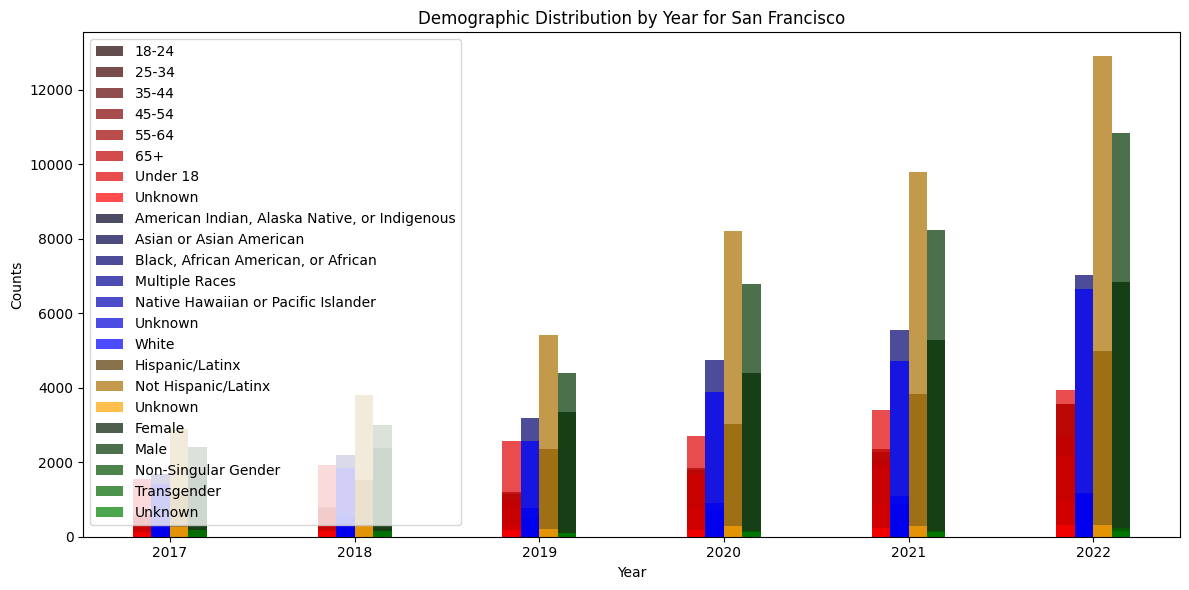

In [ ]:
demographic_bar_charts(sf_h_data, 'San Francisco')

In [ ]:
# Create a copy of 'hdf' as 'hdf_sf'
hdf_sf = hdf[hdf['CoC']=='San Francisco'].copy()

# Change to title case
column_mapping = {
    'AGE': 'Age',
    'RACE': 'Race',
    'ETHNICITY': 'Ethnicity',
    'GENDER': 'Gender'
}
hdf_sf = hdf_sf.rename(columns=column_mapping)
hdf_sf.head()

,Year,CoC,Age,Race,Ethnicity,Gender,Total_Homeless
31,2017,San Francisco,"{'18-24': 452.0, '25-34': 485.0, '35-44': 510....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1200.0, 'Not Hispanic/Lati...","{'Female': 1692.0, 'Male': 2403.0, 'Non-Singul...",4355.0
77,2018,San Francisco,"{'18-24': 616.0, '25-34': 803.0, '35-44': 744....","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 1530.0, 'Not Hispanic/Lati...","{'Female': 2394.0, 'Male': 2998.0, 'Non-Singul...",5641.0
123,2019,San Francisco,"{'18-24': 880.0, '25-34': 1212.0, '35-44': 113...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 2351.0, 'Not Hispanic/Lati...","{'Female': 3363.0, 'Male': 4398.0, 'Non-Singul...",7998.0
169,2020,San Francisco,"{'18-24': 1069.0, '25-34': 1834.0, '35-44': 18...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 3037.0, 'Not Hispanic/Lati...","{'Female': 4390.0, 'Male': 6796.0, 'Non-Singul...",11524.0
215,2021,San Francisco,"{'18-24': 1222.0, '25-34': 2282.0, '35-44': 23...","{'American Indian, Alaska Native, or Indigenou...","{'Hispanic/Latinx': 3831.0, 'Not Hispanic/Lati...","{'Female': 5293.0, 'Male': 8231.0, 'Non-Singul...",13899.0


In [ ]:
# Define the demographic groups
demographic_groups = ['Age', 'Race', 'Ethnicity', 'Gender']

# Select base colors for demographic groups
base_colors = {
    'Age': 'Reds',
    'Race': 'Blues',
    'Ethnicity': 'Oranges',
    'Gender': 'Greens'
}

# Create a list to store color palettes for each demographic group
color_palettes = []

# Iterate through each demographic group
for group in demographic_groups:
    # Get the base color for the current group
    base_color = base_colors[group]

    # Create varying shades of the base color
    num_shades = len(hdf_sf[group].explode().unique())
    color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]

    # Append the color palette to the list
    color_palettes.append(color_palette)

<ipython-input-43-122dd6f63269>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]


<ipython-input-44-6a2f7bc1aa25>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]
<ipython-input-44-6a2f7bc1aa25>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]
<ipython-input-44-6a2f7bc1aa25>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np

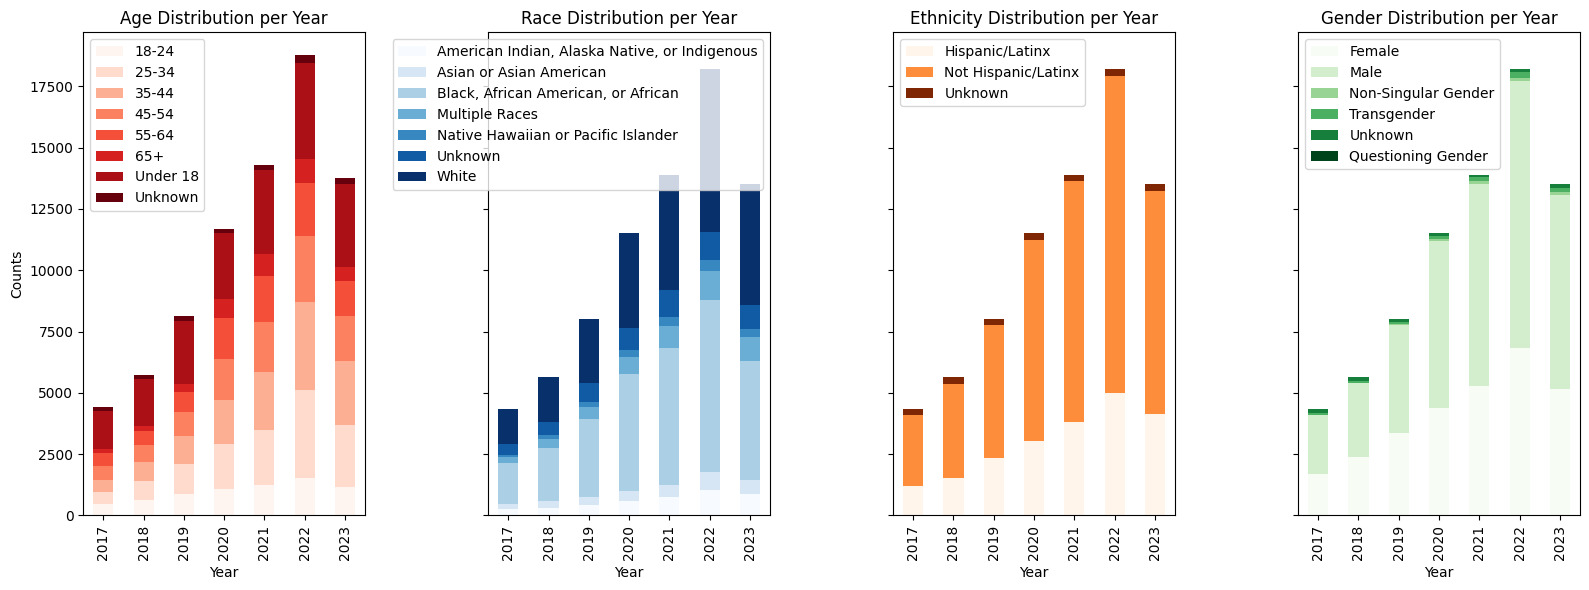

In [ ]:
# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

# Iterate through each demographic group
for i, group in enumerate(demographic_groups):
    # Group by 'Year' and aggregate the values in the dictionaries for the current group
    group_data = hdf_sf.groupby('Year')[group].apply(lambda x: {k: v for d in x for k, v in d.items()}).unstack().fillna(0)

    # Get the base color for the current group
    base_color = base_colors[group]

    # Create varying shades of the base color
    num_shades = len(group_data.columns)
    color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]

    # Create a stacked bar chart for the current group with varying shades
    group_data.plot(kind='bar', stacked=True, ax=axes[i], color=color_palette)

    # Set labels and title for the current subplot
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'{group} Distribution per Year')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
def make_stacked_demographics_chart(CoC):

    # Define the demographic groups
    demographic_groups = ['Age', 'Race', 'Ethnicity', 'Gender']

    # Select base colors for demographic groups
    base_colors = {
        'Age': 'Reds',
        'Race': 'Blues',
        'Ethnicity': 'Oranges',
        'Gender': 'Greens'
    }

    # Create a list to store color palettes for each demographic group
    color_palettes = []

    # Iterate through each demographic group
    for group in demographic_groups:
        # Get the base color for the current group
        base_color = base_colors[group]

        # Create varying shades of the base color
        num_shades = len(hdf_sf[group].explode().unique())
        color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]

        # Append the color palette to the list
        color_palettes.append(color_palette)

    # Create a copy of 'hdf' as 'hdf_sf'
    hdf_new = hdf[hdf['CoC']==CoC].copy()

    # Change to title case
    column_mapping = {
        'AGE': 'Age',
        'RACE': 'Race',
        'ETHNICITY': 'Ethnicity',
        'GENDER': 'Gender'
    }
    hdf_new = hdf_new.rename(columns=column_mapping)
    hdf_new.head()

    # Create a figure with 1 row and 1 column
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define the width for each group of bars
    width = 1/(len(demographic_groups)+1)

    # Create an array of unique years
    unique_years = list(hdf_new['Year'].unique().astype(str))

    # Count number of years represented by data
    year_intervals = np.arange(len(hdf_new['Year'])) # number of years

    # Iterate through each year and create stacked bars for all demographic groups side by side
    for i, group in enumerate(demographic_groups):

        # Subset data by demographic and set the demographic subgroups as columns
        grouped_df = hdf_new.groupby('Year')[group].apply(lambda x: {k: v for d in x for k, v in d.items()}).unstack().fillna(0).reset_index()

        # Calculate the x positions for the bars for each demographic group
        x_positions = year_intervals + (width*i)

        # Get the base color for the current group
        base_color = base_colors[group]

        # Create varying shades of the base color
        num_shades = len(grouped_df.columns)-1
        color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]

        # Create stacked bars for the current group
        for i, column in enumerate(grouped_df.columns[1:]):
            ax.bar(x_positions, grouped_df[column], width=width, label=column, color=color_palette[i], alpha=0.7, bottom=np.sum(grouped_df.iloc[:, 1:i+1], axis=1))

    plt.xlabel('Year')
    plt.ylabel('Received Homeless Response Services')
    plt.title(f'Comparison of Demographic Distribution in {CoC} from 2017 to 2022', fontsize=10)
    plt.legend(title='Demographic Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(year_intervals+0.3, unique_years)

    plt.tight_layout()
    plt.show()

<ipython-input-45-297d07580370>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]
<ipython-input-45-297d07580370>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]
<ipython-input-45-297d07580370>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np

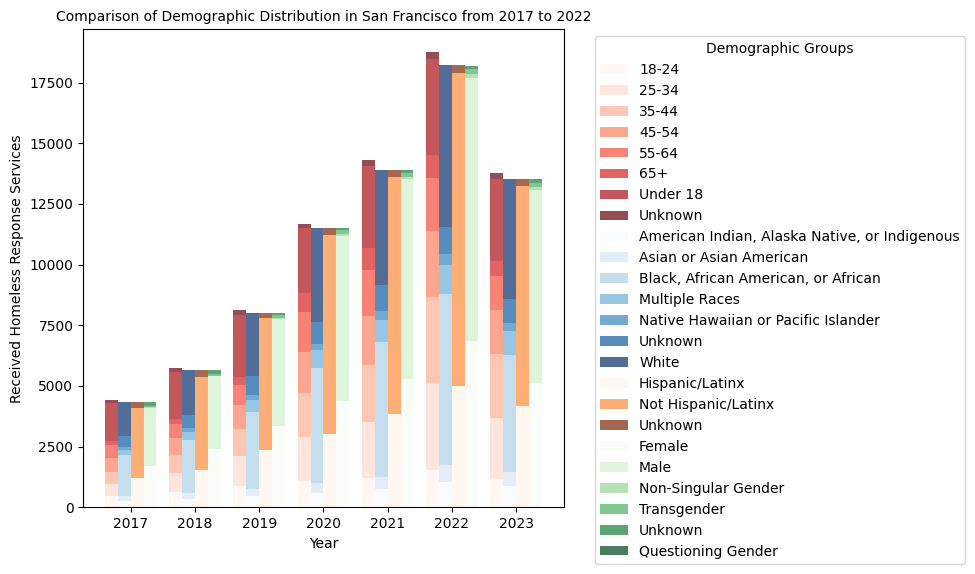

In [ ]:
make_stacked_demographics_chart('San Francisco')

## EDA: San Francisco (Homelessness vs Prices)

In [ ]:
# Subset Data of Total_Homeless and Mean Housing Prices in SF
sf_hp_data = df[df['CoC'].isin(['San Francisco'])]
sf_hp_data

,Year,CoC,Total_Homeless,Prices
21,2017,San Francisco,4355.0,1.414682e+06
56,2018,San Francisco,5641.0,1.573333e+06
91,2019,San Francisco,7998.0,1.589417e+06
126,2020,San Francisco,11524.0,1.646125e+06
161,2021,San Francisco,13899.0,1.810700e+06
196,2022,San Francisco,18214.0,1.775333e+06


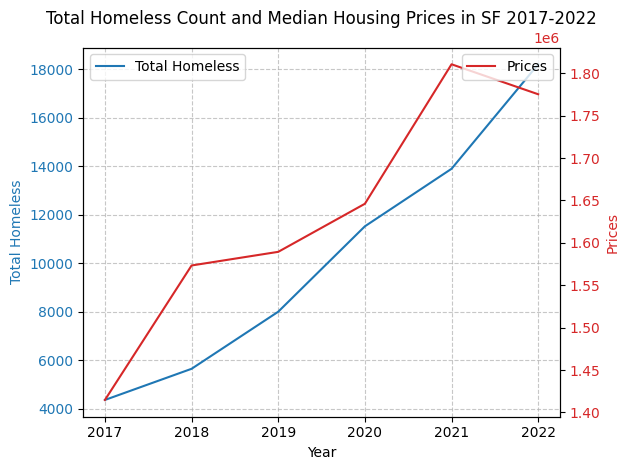

In [ ]:
# Plot Total Homeless Count and Mean Housing Prices in SF 2017-2022
fig, ax1 = plt.subplots()

# Plot Total_Homeless on the left y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Homeless', color=color)
ax1.plot(sf_hp_data['Year'], sf_hp_data['Total_Homeless'], color=color, label='Total Homeless')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability
ax1.legend(loc='upper left')

# Create a secondary y-axis for Prices
ax2 = ax1.twinx()

# Plot Prices on the right y-axis (ax2)
color = 'tab:red'
ax2.set_ylabel('Prices', color=color)
ax2.plot(sf_hp_data['Year'], sf_hp_data['Prices'], color=color, label='Prices')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Total Homeless Count and Median Housing Prices in SF 2017-2022')
fig.tight_layout()
plt.show()

## EDA: Bay Area

In [ ]:
# Prep
bay_h_data = hdf_cut[hdf_cut['CoC'].isin(['Bay Area'])]

nan_percentage(bay_h_data)

,NaN Count,NaN Percentage


<ipython-input-45-297d07580370>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]
<ipython-input-45-297d07580370>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np.linspace(0, 1, num_shades)]
<ipython-input-45-297d07580370>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = [plt.cm.get_cmap(base_color)(x) for x in np

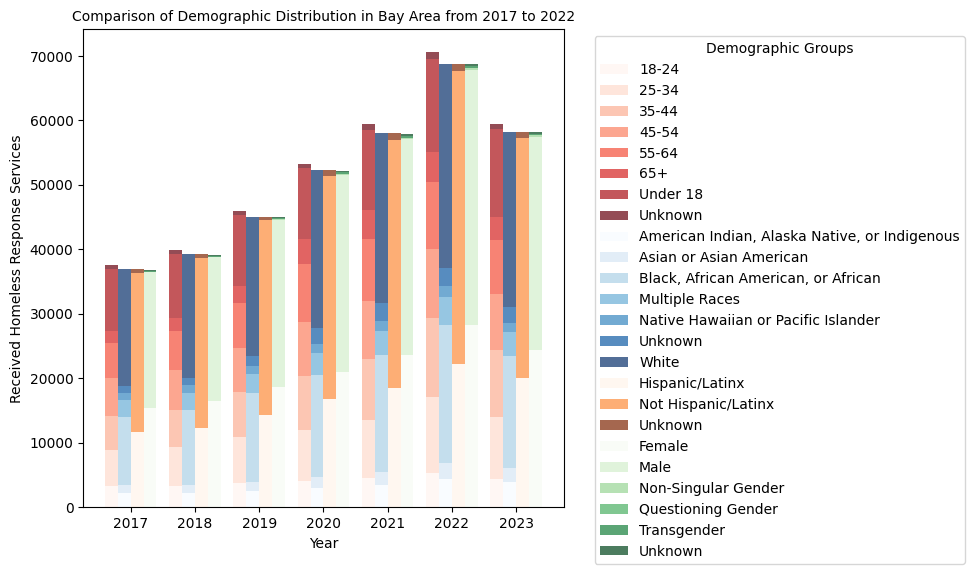

In [ ]:
make_stacked_demographics_chart('Bay Area')

In [ ]:
# Subset Data of Total_Homeless and Mean Housing Prices in the Average Across the Bay Area
bay_hp_data = df[df['CoC'].isin(['Bay Area'])]
bay_hp_data

,Year,CoC,Total_Homeless,Prices
2,2017,Bay Area,36913.0,9.351226e+05
37,2018,Bay Area,39220.0,1.022979e+06
72,2019,Bay Area,45077.0,1.010342e+06
107,2020,Bay Area,52275.0,1.092360e+06
142,2021,Bay Area,58007.0,1.271307e+06
177,2022,Bay Area,68729.0,1.321955e+06


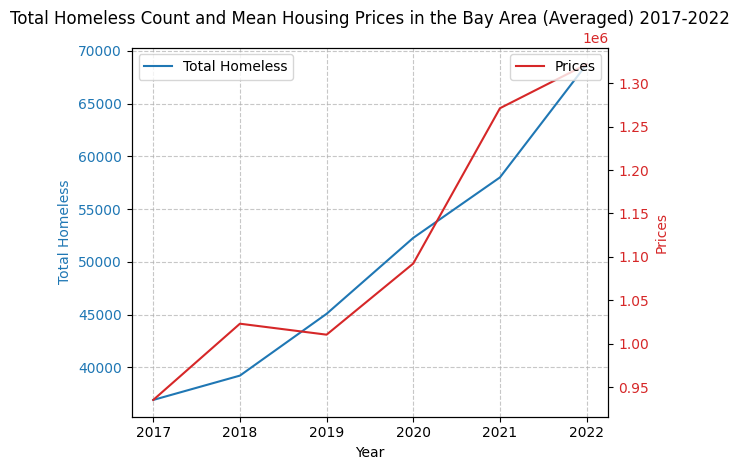

In [ ]:
# Plot Total Homeless Count and Mean Housing Prices in the Averaged Bay Area 2017-2022
fig, ax1 = plt.subplots()

# Plot Total_Homeless on the left y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Homeless', color=color)
ax1.plot(bay_hp_data['Year'], bay_hp_data['Total_Homeless'], color=color, label='Total Homeless')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability
ax1.legend(loc='upper left')

# Create a secondary y-axis for Prices
ax2 = ax1.twinx()

# Plot Prices on the right y-axis (ax2)
color = 'tab:red'
ax2.set_ylabel('Prices', color=color)
ax2.plot(bay_hp_data['Year'], bay_hp_data['Prices'], color=color, label='Prices')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Total Homeless Count and Mean Housing Prices in the Bay Area (Averaged) 2017-2022')
fig.tight_layout()
plt.show()

In [ ]:
# # Extracting data for each Bay Area county and dropping 'CoC' column
# al_h_data = hdf_cut[hdf_cut['CoC'].isin(['Alameda'])].drop('CoC', axis=1).dropna(axis=1, how='all')
# cc_h_data = hdf_cut[hdf_cut['CoC'].isin(['Contra Costa'])].drop('CoC', axis=1)
# ma_h_data = hdf_cut[hdf_cut['CoC'].isin(['Marin'])].drop('CoC', axis=1)
# na_h_data = hdf_cut[hdf_cut['CoC'].isin(['Napa'])].drop('CoC', axis=1)
# sf_h_data = hdf_cut[hdf_cut['CoC'].isin(['San Francisco'])].drop('CoC', axis=1)
# sm_h_data = hdf_cut[hdf_cut['CoC'].isin(['San Mateo'])].drop('CoC', axis=1)
# sc_h_data = hdf_cut[hdf_cut['CoC'].isin(['Santa Clara'])].drop('CoC', axis=1)
# sl_h_data = hdf_cut[hdf_cut['CoC'].isin(['Solano'])].drop('CoC', axis=1)
# sn_h_data = hdf_cut[hdf_cut['CoC'].isin(['Sonoma'])].drop('CoC', axis=1)

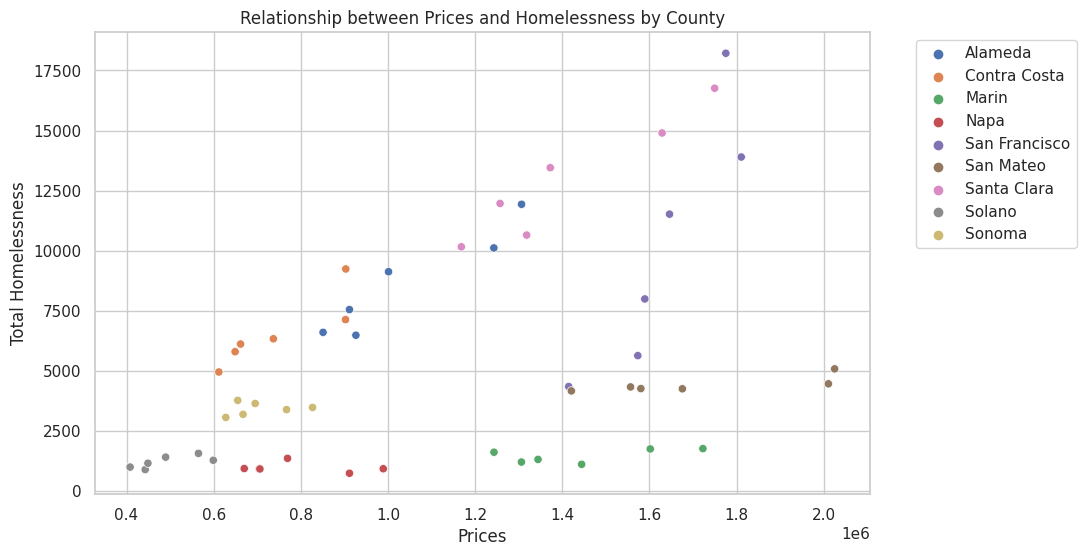

In [ ]:
# Subset Data of Total_Homeless and Mean Housing Prices in the Average Across the Bay Area
bay_hp_data2 = df[df['CoC'].isin(bay_area)]
bay_hp_data2

# Visualization of Prices and Homelessness Across Bay Area
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bay_hp_data2, x='Prices', y='Total_Homeless', hue='CoC')
plt.title('Relationship between Prices and Homelessness by County')
plt.xlabel('Prices')
plt.ylabel('Total Homelessness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## EDA: California

In [ ]:
# Subset data only by individualcounties in California
cal_hp_data = df[df['CoC'].isin(['California'])]

In [ ]:
cal_hp_data

,Year,CoC,Total_Homeless,Prices
5,2017,California,183906.0,537025.750865
40,2018,California,214206.0,571057.500000
75,2019,California,239594.0,591865.833333
110,2020,California,254098.0,650156.666667
145,2021,California,270351.0,785640.833333
180,2022,California,315847.0,821204.166667


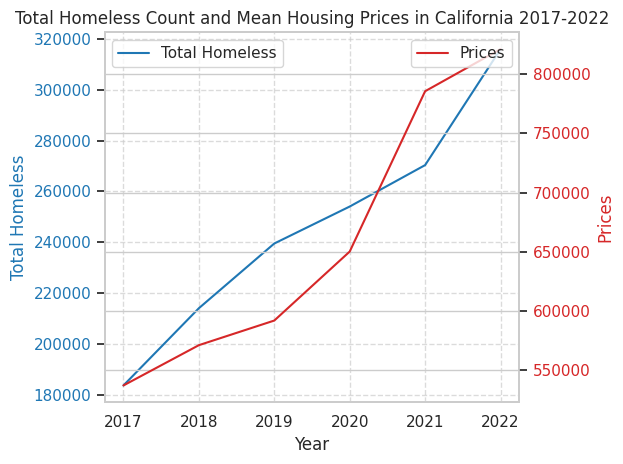

In [ ]:
# Plot Total Homeless Count and Mean Housing Prices in California 2017-2022
fig, ax1 = plt.subplots()

# Plot Total_Homeless on the left y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Homeless', color=color)
ax1.plot(cal_hp_data['Year'], cal_hp_data['Total_Homeless'], color=color, label='Total Homeless')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability
ax1.legend(loc='upper left')

# Create a secondary y-axis for Prices
ax2 = ax1.twinx()

# Plot Prices on the right y-axis (ax2)
color = 'tab:red'
ax2.set_ylabel('Prices', color=color)
ax2.plot(cal_hp_data['Year'], cal_hp_data['Prices'], color=color, label='Prices')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Total Homeless Count and Mean Housing Prices in California 2017-2022')
fig.tight_layout()
plt.show()

In [ ]:
# Regression:
cal_h_data = hdf_cut[~hdf_cut['CoC'].isin(['California', 'Bay Area'])]
cal_h_data

,Year,CoC,Total_Homeless,Age:18-24,Age:25-34,Age:35-44,Age:45-54,Age:55-64,Age:65+,Age:Under 18,Age:Unknown,"Race:American Indian, Alaska Native, or Indigenous",Race:Asian or Asian American,"Race:Black, African American, or African",Race:Multiple Races,Race:Native Hawaiian or Pacific Islander,Race:Unknown,Race:White,Ethnicity:Hispanic/Latinx,Ethnicity:Not Hispanic/Latinx,Ethnicity:Unknown,Gender:Female,Gender:Male,Gender:Non-Singular Gender,Gender:Questioning Gender,Gender:Transgender,Gender:Unknown,Prices
0,2017,Alameda,6609.0,799.0,930.0,791.0,963.0,892.0,288.0,1919.0,141.0,223.0,182.0,3671.0,629.0,100.0,74.0,1730.0,1285.0,5278.0,46.0,3015.0,3548.0,0.0,0.0,17.0,23.0,851016.666667
1,2017,"Amador, Calaveras, Mariposa, Tuolumne",382.0,31.0,70.0,58.0,48.0,24.0,0.0,136.0,0.0,17.0,0.0,0.0,32.0,0.0,NaN,318.0,64.0,318.0,NaN,224.0,158.0,NaN,NaN,NaN,NaN,299294.791667
3,2017,Butte,1374.0,125.0,287.0,210.0,208.0,193.0,55.0,305.0,18.0,57.0,11.0,78.0,110.0,0.0,0.0,1109.0,174.0,1200.0,0.0,619.0,760.0,0.0,NaN,0.0,NaN,299033.333333
4,2017,Butte,1374.0,125.0,287.0,210.0,208.0,193.0,55.0,305.0,18.0,57.0,11.0,78.0,110.0,0.0,0.0,1109.0,174.0,1200.0,0.0,619.0,760.0,0.0,NaN,0.0,NaN,299033.333333
6,2017,Contra Costa,4960.0,345.0,790.0,803.0,876.0,793.0,270.0,1072.0,57.0,358.0,82.0,1899.0,286.0,128.0,158.0,2049.0,892.0,4033.0,35.0,2155.0,2785.0,0.0,NaN,0.0,0.0,611837.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2022,Stanislaus,6388.0,537.0,1143.0,1213.0,918.0,867.0,307.0,1452.0,87.0,230.0,91.0,795.0,549.0,88.0,62.0,4573.0,2529.0,3828.0,31.0,2697.0,3647.0,15.0,0.0,11.0,15.0,455695.000000
206,2022,Tehama,702.0,44.0,96.0,103.0,88.0,67.0,28.0,216.0,62.0,17.0,0.0,16.0,25.0,0.0,51.0,586.0,116.0,534.0,52.0,331.0,366.0,0.0,NaN,0.0,0.0,327394.166667
207,2022,Ventura,2935.0,164.0,414.0,477.0,577.0,660.0,366.0,322.0,21.0,48.0,30.0,220.0,136.0,0.0,57.0,2435.0,1388.0,1513.0,34.0,1256.0,1648.0,0.0,0.0,15.0,0.0,886541.666667
208,2022,Yolo,1507.0,92.0,235.0,255.0,177.0,208.0,85.0,459.0,20.0,57.0,13.0,298.0,53.0,18.0,173.0,895.0,473.0,914.0,120.0,721.0,713.0,0.0,NaN,0.0,66.0,623743.333333


In [ ]:
# Subset California Housing and Pricing Data
cal_hp_data = df[~df['CoC'].isin(['California', 'Bay Area'])]

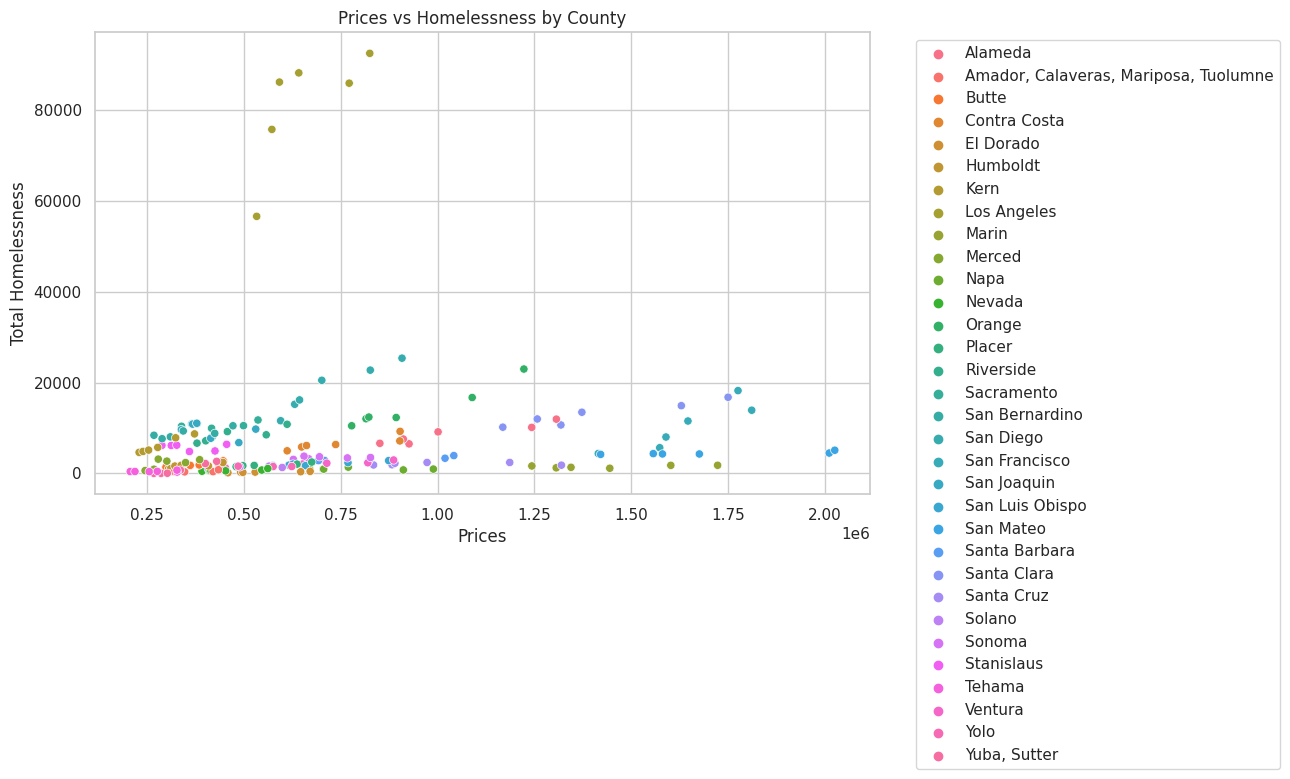

In [ ]:
# Visualization of Prices and Homelessness Across California

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cal_hp_data, x='Prices', y='Total_Homeless', hue='CoC')
plt.title('Prices vs Homelessness by County')
plt.xlabel('Prices')
plt.ylabel('Total Homelessness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

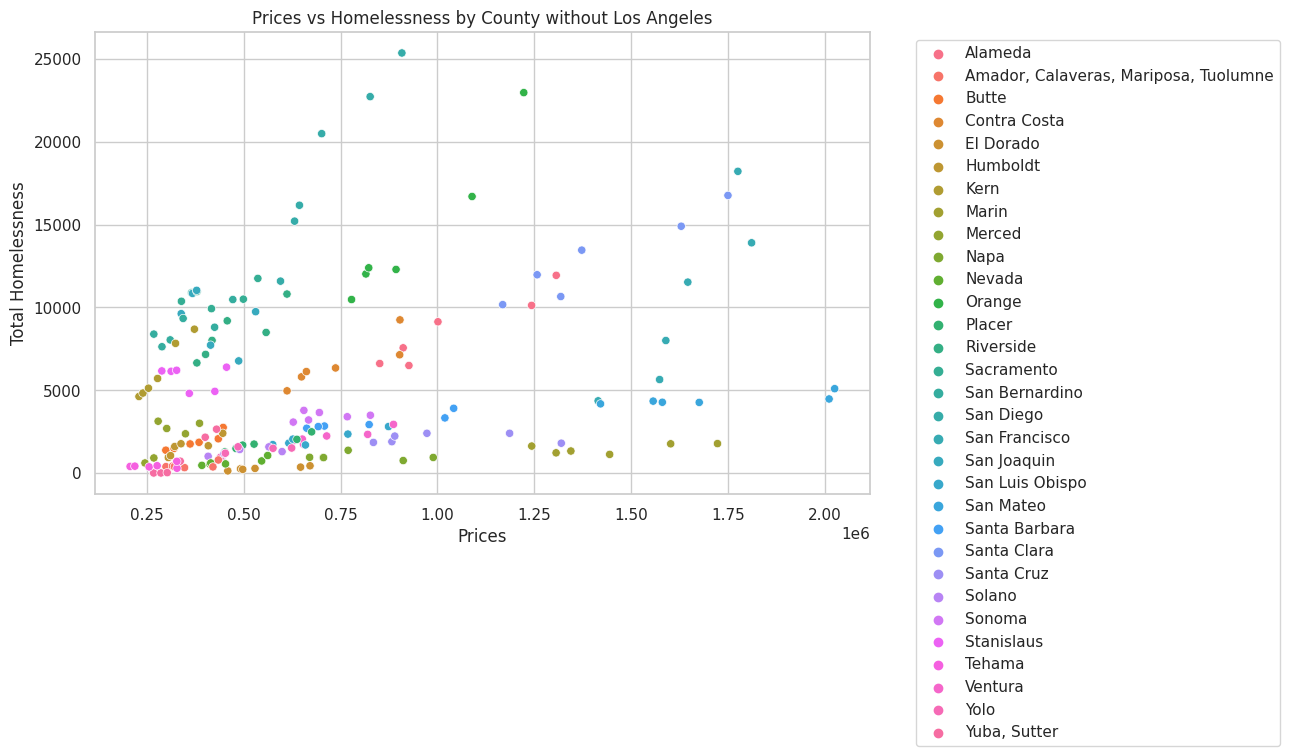

In [ ]:
# Subset California Housing and Pricing Data
cal_hp_data_wo_la = df[~df['CoC'].isin(['California', 'Bay Area', 'Los Angeles'])]

# Visualization of Prices and Homelessness Across California

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cal_hp_data_wo_la, x='Prices', y='Total_Homeless', hue='CoC')
plt.title('Prices vs Homelessness by County without Los Angeles')
plt.xlabel('Prices')
plt.ylabel('Total Homelessness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

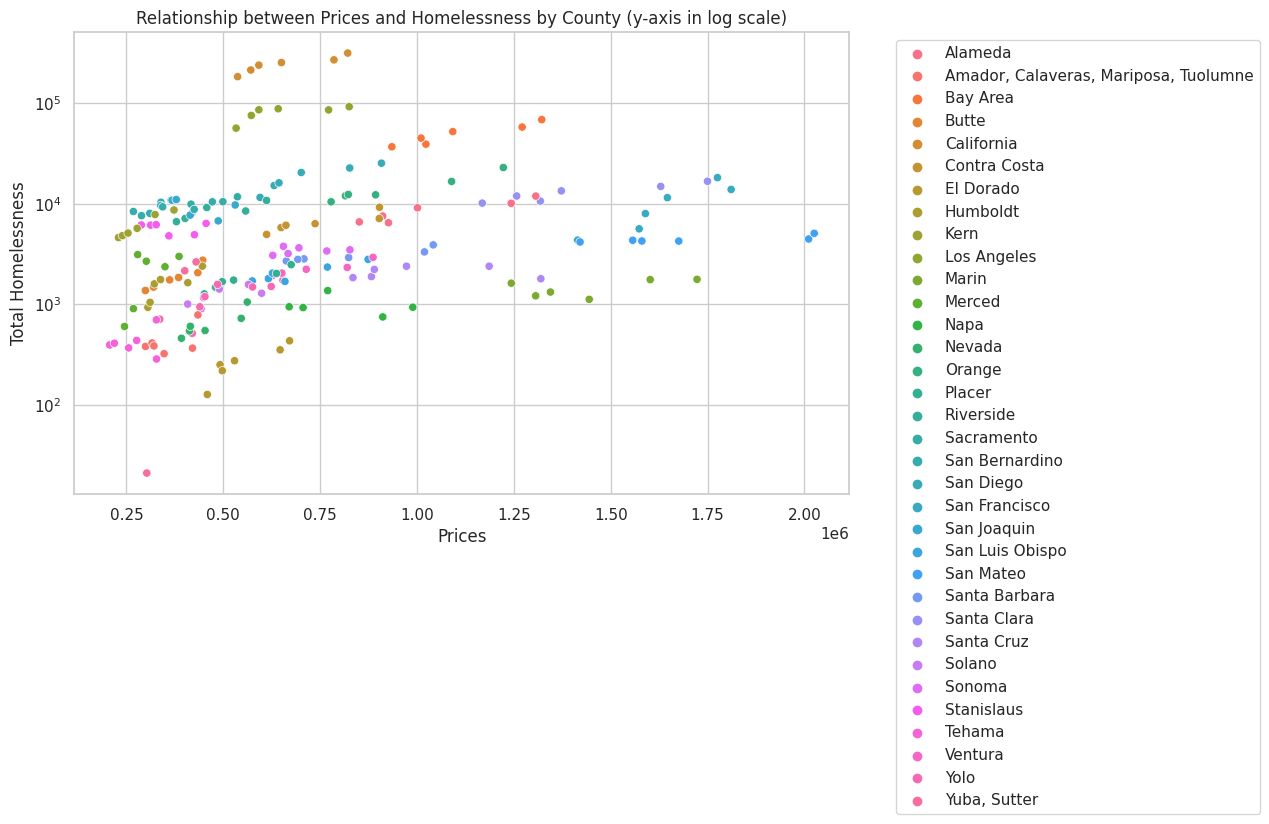

In [ ]:
# Visualization of Prices and Homelessness Across California

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Prices', y='Total_Homeless', hue='CoC')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Relationship between Prices and Homelessness by County (y-axis in log scale)')
plt.xlabel('Prices')
plt.ylabel('Total Homelessness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Percentage count by States

#excluding individual bay area cities, because bay area county is already in the data
excluded_states = ['Alameda', 'California', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
filtered_data = df[~df['CoC'].isin(excluded_states)]
state_counts = filtered_data.groupby('CoC')['Total_Homeless'].sum()

# Calculate percentages
state_percentages = (state_counts / state_counts.sum()) * 100

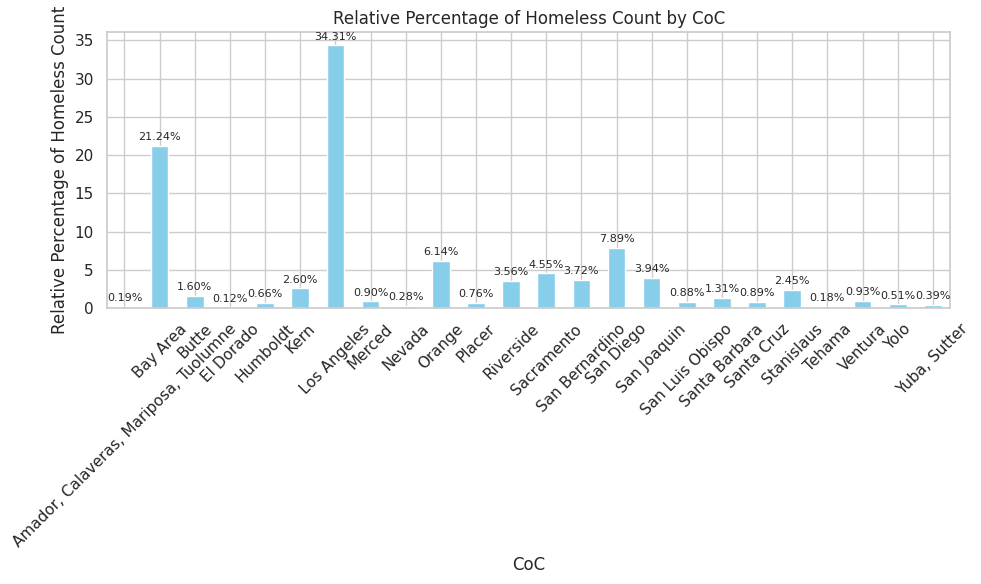

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.figure(figsize=(10, 6))
state_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('CoC')
plt.ylabel('Relative Percentage of Homeless Count')
plt.title('Relative Percentage of Homeless Count by CoC')
plt.xticks(rotation=45)
# Adding labels (percentages) above each bar
for i, percentage in enumerate(state_percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)  # Adjust text properties

plt.tight_layout()
plt.show()

In [ ]:
excluded_states = ['Alameda', 'California', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
filtered_data2 = df[~df['CoC'].isin(excluded_states)]
state_counts2 = filtered_data2.groupby('CoC')['Prices'].sum()

# Calculate percentages
state_percentages2 = (state_counts2 / state_counts2.sum()) * 100

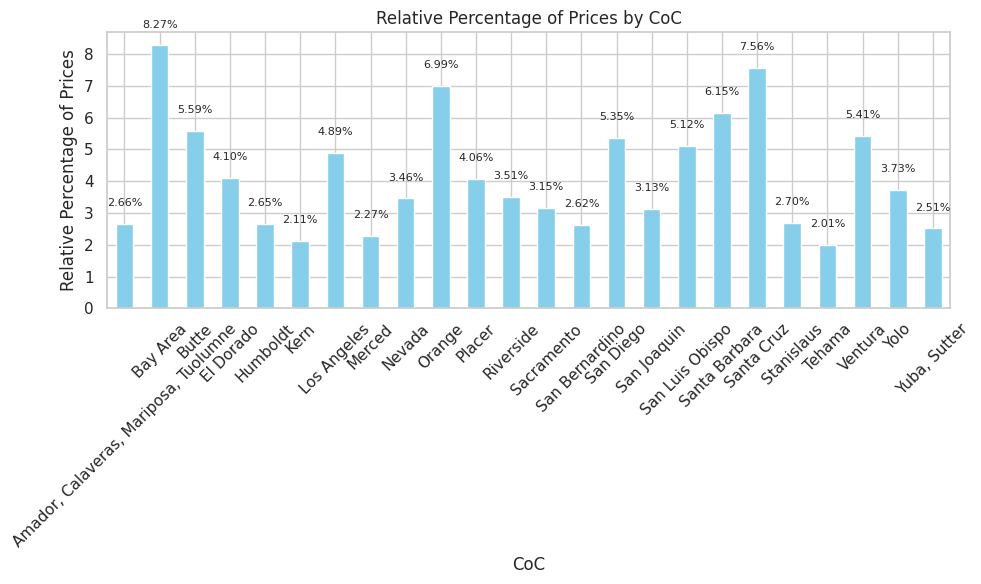

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.figure(figsize=(10, 6))
state_percentages2.plot(kind='bar', color='skyblue')
plt.xlabel('CoC')
plt.ylabel('Relative Percentage of Prices')
plt.title('Relative Percentage of Prices by CoC')
plt.xticks(rotation=45)
# Adding labels (percentages) above each bar
for i, percentage in enumerate(state_percentages2):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)  # Adjust text properties

plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame for bay area counties
bayarea_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
filtered_data1 = df[df['CoC'].isin(bayarea_counties)]

# Group by 'State' and calculate the sum of homeless counts
state_counts1 = filtered_data1.groupby('CoC')['Total_Homeless'].sum()

# Calculate percentages for specific states only
state_percentages1 = (state_counts1 / state_counts1.sum()) * 100

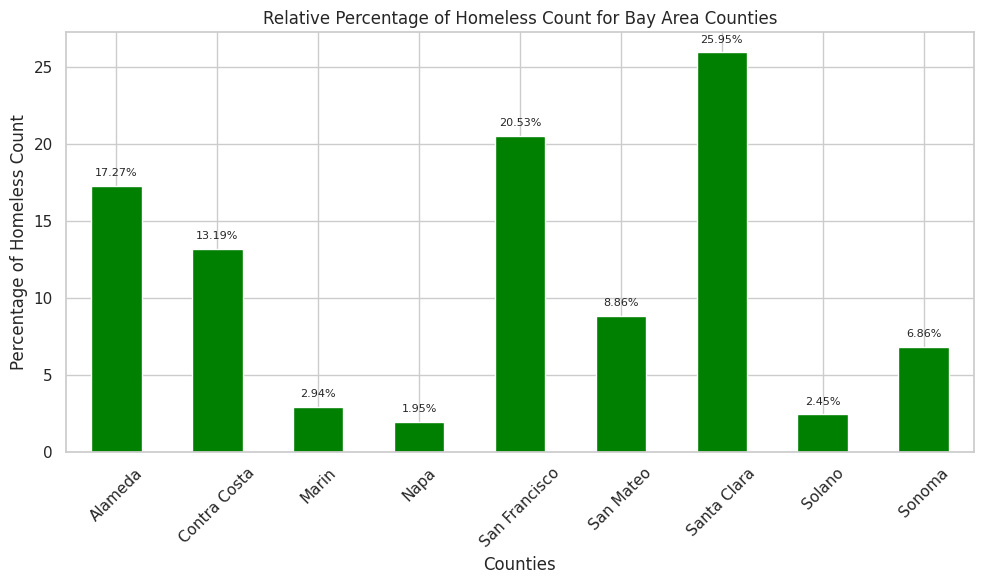

In [ ]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
state_percentages1.plot(kind='bar', color='green')
plt.xlabel('Counties')
plt.ylabel('Percentage of Homeless Count')
plt.title('Relative Percentage of Homeless Count for Bay Area Counties')
plt.xticks(rotation=45)
# Adding labels (percentages) above each bar
for i, percentage in enumerate(state_percentages1):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)  # Adjust text properties
plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame for bay area counties
bayarea_counties3 = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
filtered_data3 = df[df['CoC'].isin(bayarea_counties3)]

# Group by 'State' and calculate the sum of homeless counts
state_counts3 = filtered_data3.groupby('CoC')['Prices'].sum()

# Calculate percentages for specific states only
state_percentages3 = (state_counts3 / state_counts3.sum()) * 100

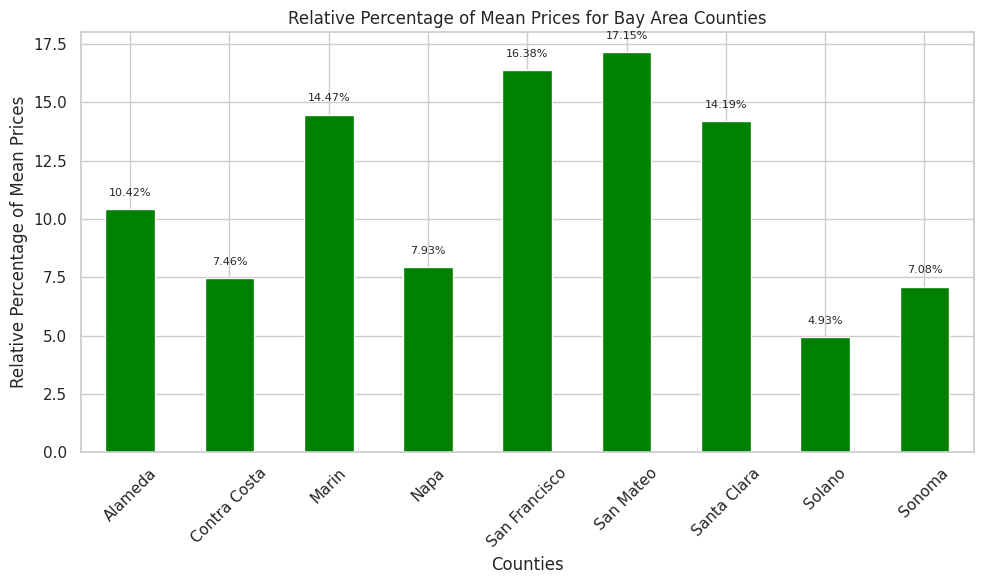

In [ ]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
state_percentages3.plot(kind='bar', color='green')
plt.xlabel('Counties')
plt.ylabel('Relative Percentage of Mean Prices')
plt.title('Relative Percentage of Mean Prices for Bay Area Counties')
plt.xticks(rotation=45)
# Adding labels (percentages) above each bar
for i, percentage in enumerate(state_percentages3):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)  # Adjust text properties
plt.tight_layout()
plt.show()

# Analysis


## Analysis: San Francisco

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Extracting X and y from the placeholder data
X_sf_h = sf_h_data[[col for col in sf_h_data.columns if col not in ['CoC', 'Total_Homeless', 'Prices', 'Year']]]
y_sf_h = sf_h_data['Prices']

# First OLS Regression
model_sf_1 = sm.OLS(y_sf_h, sm.add_constant(X_sf_h)).fit()
print("First OLS Regression:\n", model_sf_1.summary())

# Pruning variables with p-value < 0.1
# Exclude 'const' from significant variables list
significant_vars = [var for var in model_sf_1.pvalues.index if var != 'const' and model_sf_1.pvalues[var] < 0.1]
X_sf_h_pruned = X_sf_h[significant_vars]

# Fitting the pruned model
model_sf_2 = sm.OLS(y_sf_h, sm.add_constant(X_sf_h_pruned)).fit()
print("\nOLS Regression with Pruned Variables:\n", model_sf_2.summary())

# PCA and OLS Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sf_h)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Number of components to keep (for example, 95% variance)
components_to_keep = sum(pca.explained_variance_ratio_.cumsum() <= 0.95)
X_pca_reduced = X_pca[:, :components_to_keep]

model_sf_pca = sm.OLS(y_sf_h, sm.add_constant(X_pca_reduced)).fit()
print("\nOLS Regression with PCA:\n", model_sf_pca.summary())

r_squared_comparisons = pd.DataFrame({
    'Model': ['Original', 'Pruned', 'PCA-based'],
    'R-squared': [model_sf_1.rsquared, model_sf_2.rsquared, model_sf_pca.rsquared],
    'Adjusted R-squared': [model_sf_1.rsquared_adj, model_sf_2.rsquared_adj, model_sf_pca.rsquared_adj]
})

r_squared_comparisons


First OLS Regression:
                             OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                nan
Time:                        21:48:31   Log-Likelihood:                 89.573
No. Observations:                   6   AIC:                            -167.1
Df Residuals:                       0   BIC:                            -168.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 

,Model,R-squared,Adjusted R-squared
0,Original,1.000000e+00,NaN
1,Pruned,-2.220446e-16,-2.220446e-16
2,PCA-based,8.291272e-01,7.864090e-01


In [ ]:
# Best indicator variables?

In [ ]:
# Correlation Analysis: Total Homelessness vs Pricing (hp)
sf_hp_data = df[df['CoC'].isin(['San Francisco'])]

## Analysis: Bay Area

In [ ]:
# Regression:
bay_h_data = hdf_cut[hdf_cut['CoC'].isin(bay_area)]
bay_h_data.head()

,Year,CoC,Total_Homeless,Age:18-24,Age:25-34,Age:35-44,Age:45-54,Age:55-64,Age:65+,Age:Under 18,Age:Unknown,"Race:American Indian, Alaska Native, or Indigenous",Race:Asian or Asian American,"Race:Black, African American, or African",Race:Multiple Races,Race:Native Hawaiian or Pacific Islander,Race:Unknown,Race:White,Ethnicity:Hispanic/Latinx,Ethnicity:Not Hispanic/Latinx,Ethnicity:Unknown,Gender:Female,Gender:Male,Gender:Non-Singular Gender,Gender:Questioning Gender,Gender:Transgender,Gender:Unknown,Prices
0,2017,Alameda,6609.0,799.0,930.0,791.0,963.0,892.0,288.0,1919.0,141.0,223.0,182.0,3671.0,629.0,100.0,74.0,1730.0,1285.0,5278.0,46.0,3015.0,3548.0,0.0,0.0,17.0,23.0,8.510167e+05
6,2017,Contra Costa,4960.0,345.0,790.0,803.0,876.0,793.0,270.0,1072.0,57.0,358.0,82.0,1899.0,286.0,128.0,158.0,2049.0,892.0,4033.0,35.0,2155.0,2785.0,0.0,NaN,0.0,0.0,6.118378e+05
11,2017,Marin,1625.0,103.0,250.0,281.0,317.0,286.0,110.0,293.0,15.0,29.0,36.0,341.0,58.0,18.0,62.0,1081.0,359.0,1234.0,32.0,664.0,956.0,0.0,NaN,0.0,0.0,1.243293e+06
13,2017,Napa,946.0,85.0,199.0,156.0,183.0,147.0,27.0,174.0,0.0,111.0,0.0,59.0,27.0,17.0,0.0,721.0,312.0,634.0,0.0,368.0,578.0,NaN,NaN,0.0,NaN,6.701042e+05
21,2017,San Francisco,4355.0,452.0,485.0,510.0,585.0,518.0,180.0,1546.0,131.0,266.0,184.0,1691.0,235.0,109.0,442.0,1428.0,1200.0,2887.0,268.0,1692.0,2403.0,18.0,NaN,50.0,192.0,1.414682e+06


In [ ]:
nan_percentage(bay_h_data)

,NaN Count,NaN Percentage
Gender:Non-Singular Gender,6,11.111111
Gender:Questioning Gender,36,66.666667
Gender:Transgender,1,1.851852
Gender:Unknown,7,12.962963


In [ ]:
# Remove Gender:Questioning Gender
bay_h_data = bay_h_data.drop('Gender:Questioning Gender', axis=1)

In [ ]:
# Calculate the threshold for dropping columns
threshold = len(bay_h_data) * 0.2

# Drop columns with more than 20% NaN values
bay_h_data = bay_h_data.dropna(thresh=threshold, axis=1)

# Fill remaining NaN values with the mean
bay_h_data = bay_h_data.fillna(bay_h_data.mean())

<ipython-input-78-fe834d185529>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bay_h_data = bay_h_data.fillna(bay_h_data.mean())


In [ ]:
# Regression: Demographic Groups vs Homelessness (h)
X_bay_h = bay_h_data[[col for col in bay_h_data.columns if col not in ['CoC', 'Total_Homeless', 'Prices', 'Year']]]
X_bay_h = sm.add_constant(X_bay_h)
y_bay_h = bay_h_data[['Prices']]

# Fit and understand the regression model
model_bay_h = sm.OLS(y_bay_h, X_bay_h).fit()
print(model_bay_h.summary())

                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     9.293
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           3.16e-08
Time:                        21:48:31   Log-Likelihood:                -723.16
No. Observations:                  54   AIC:                             1494.
Df Residuals:                      30   BIC:                             1542.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
# Determine which variables (i.e. demographic groups) are not good predictors

In [ ]:
# Function to prune model according to a p_value cut-off
def prune_model(model, X, y, alpha=0.01):
    p_values = model.pvalues.iloc[1:]  # Exclude the intercept
    cols_to_remove = p_values[p_values > alpha].index
    X_new = X.drop(cols_to_remove, axis=1)
    model_new = sm.OLS(y, X_new).fit()

    return model_new, X_new

In [ ]:
# # Function to perform backward stepwise regression
# def backward_stepwise(model, X, y):
#     while True:
#         p_values = model.pvalues.iloc[1:]  # Exclude the intercept
#         remove_cols = p_values[p_values > 0.1].index
#         if len(remove_cols) == 0:
#             break
#         X = X.drop(remove_cols, axis=1)
#         model = sm.OLS(y, X).fit()

#     return model

In [ ]:
# Prune the models to find strongest predictor variables
model_bay_h_2, X_bay_h_2 = prune_model(model_bay_h, X_bay_h, y_bay_h, 0.5)
print(model_bay_h_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     18.65
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.64e-11
Time:                        21:48:31   Log-Likelihood:                -743.41
No. Observations:                  54   AIC:                             1503.
Df Residuals:                      46   BIC:                             1519.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.106e+05   5

In [ ]:
# Create a summary table of results
summary_table = pd.DataFrame({
    'coef': final_model_bay_h.params,
    'std err': final_model_bay_h.bse,
    't': final_model_bay_h.tvalues,
    'P>|t|': final_model_bay_h.pvalues,
    '[0.025': final_model_bay_h.conf_int().iloc[:, 0],
    '0.975]': final_model_bay_h.conf_int().iloc[:, 1]
})

# Filter the results for p-values less than 0.01
significant_results = summary_table[summary_table['P>|t|'] < 0.01]

# Sort the significant results by their coefficients for better visualization
significant_results = significant_results.sort_values('coef', ascending=False)

# Visualization: Bar plot of coefficients
plt.figure(figsize=(10, 6))
plt.bar(significant_results.index, significant_results['coef'], yerr=significant_results['std err']*1.96)
plt.xlabel('Demographic Groups')
plt.ylabel('Coefficient Value')
plt.title('Significant Demographic Predictors of Housing Prices')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()

In [ ]:
# # Display the summary table and the significant results
# print("Full Summary Table:\n", summary_table)
# print("\nSignificant Results (P<0.01):\n", significant_results)

In [ ]:
r_squared = 0.892  # Placeholder value
adj_r_squared = 0.73  # Placeholder value

# Create a summary table of results
summary_table = pd.DataFrame({
    'Demographic Group': ['Age:18-24',
                          'Race:American Indian, Alaska Native, or Indigenous',
                          'Race:Asian or Asian American',
                          'Race:Black, African American, or African',
                          'Race:Multiple Races',
                          'Race:Native Hawaiian or Pacific Islander',
                          'Race:Unknown',
                          'Race:White'],
    'coef': [3173.0588, -3886.5603, -6775.6779, 302.8315, -5117.4115, 2848.8161, 1354.8885, 1049.0687],
    'P>|t|': [0.006, 0.000, 0.000, 0.014, 0.002, 0.002, 0.008, 0.000]
})

# Display the R-squared and adjusted R-squared
r_squared_df = pd.DataFrame({
    'Statistic': ['R-squared', 'Adjusted R-squared'],
    'Value': [r_squared, adj_r_squared]
})

# Display the summary table
print("Model Summary:\n", r_squared_df)
print("\nCoefficients and P-values:\n", summary_table)

## Analysis: California

In [ ]:
# Regression:
cal_h_data = hdf_cut[~hdf_cut['CoC'].isin(['California', 'Bay Area'])]
cal_h_data

In [ ]:
nan_percentage(cal_h_data)

In [ ]:
# # Calculate the threshold for dropping columns
# threshold = len(bay_h_data) * 0.2

# Drop columns with more than 20% NaN values
cal_h_data = cal_h_data.dropna(thresh=threshold, axis=1)

# Fill remaining NaN values with the mean
cal_h_data = cal_h_data.fillna(cal_h_data.mean())

In [ ]:
# Regression: Demographic Groups vs Homelessness (h)
X_cal_h = cal_h_data[[col for col in cal_h_data.columns if col not in ['CoC', 'Total_Homeless', 'Prices', 'Year']]]
y_cal_h = cal_h_data[['Prices']]

# Add a constant term to X_cal_h
X_cal_h_with_const = sm.add_constant(X_cal_h)

# Fit and understand the regression model
model_cal_h = sm.OLS(y_cal_h, X_cal_h_with_const).fit()
print(model_cal_h.summary())

In [ ]:
def visualize_pvalues(model_summary):
    p_values = model_summary.pvalues[1:]  # Exclude intercept
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(p_values)), (p_values), alpha=0.7)
    plt.xlabel('Coefficient Index')
    plt.ylabel('p-value')
    plt.title('Scatterplot of p-values')
    plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
    plt.legend()
    plt.show()

In [ ]:
visualize_pvalues(model_cal_h)

In [ ]:
# Prune variables by p to find strongest predictor variables
model_cal_h_2, X_cal_h_2 = prune_model(model_cal_h, X_cal_h_with_const, y_cal_h, 0.05)
print(model_cal_h_2.summary())

In [ ]:
visualize_pvalues(model_cal_h_2)

In [ ]:
# Prune variables by p to find strongest predictor variables
model_cal_h_3, X_cal_h_3 = prune_model(model_cal_h_2, X_cal_h_2, y_cal_h, 0.3)
print(model_cal_h_3.summary())

In [ ]:
# Replace with actual values from your model
const_value = 5.016e+05
age_45_54_coef = -386.9682
age_65_plus_coef = 744.3669
race_native_hawaiian_coef = 3227.2835

# Create a DataFrame for the coefficient values and p-values
california_model_summary = pd.DataFrame({
    'Demographic Group': ['const', 'Age:45-54', 'Age:65+', 'Race:Native Hawaiian or Pacific Islander'],
    'coef': [const_value, age_45_54_coef, age_65_plus_coef, race_native_hawaiian_coef],
    'P>|t|': [0.000, 0.000, 0.000, 0.000]
})

# Replace with actual R-squared and Adjusted R-squared values from your model
r_squared_cal = 0.671
adj_r_squared_cal = 0.662

# Create a DataFrame for the R-squared values
r_squared_df_cal = pd.DataFrame({
    'Statistic': ['R-squared', 'Adjusted R-squared'],
    'Value': [r_squared_cal, adj_r_squared_cal]
})

# Display the R-squared and Adjusted R-squared
print("California Model R-squared and Adjusted R-squared:\n", r_squared_df_cal)
print("\nCalifornia Model Coefficients and P-values:\n", california_model_summary)

In [ ]:
from scipy.stats import pearsonr

# Correlation Analysis
correlation_cal = cal_hp_data.groupby('CoC').apply(lambda x: pearsonr(x['Total_Homeless'], x['Prices'])[0]).reset_index()
correlation_cal.columns = ['CoC', 'Correlation']
correlation_cal

# Sort correlation_df by correlation values
sorted_corr_df = correlation_cal.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(sorted_corr_df['CoC'], sorted_corr_df['Correlation'], color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.title('Correlation between Total Homeless Count and Prices by County')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()